In [1]:
import torch
import torch.nn as nn  
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np
import csv

In [2]:
transform = transforms.ToTensor() #creat a tensor

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform= transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)
#type(iter(data_loader))

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
images, labels  = next(iter(data_loader))
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [4]:
class autoencoder_cnn(nn.Module):
    def __init__(self) :
        super().__init__()
        self.encorder = nn.Sequential(nn.Conv2d(1, 16, 3, stride=2, padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(16, 32, 3, stride=2, padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(32, 64, 7),
                                      )
        self.decoder = nn.Sequential(nn.ConvTranspose2d(64, 32, 7),
                                      nn.ReLU(),
                                      nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
                                      nn.ReLU(),
                                      nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
                                      nn.Sigmoid() # reduce de size of picture to 3
                                      )
        
        
    def forward(self, x):
        encoded = self.encorder(x)
        decoded = self.decoder(encoded)
        return decoded    

In [5]:
model = autoencoder_cnn()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [6]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        #img = img.reshape(-1, 28 * 28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch : {epoch + 1}, Loss : {loss.item() : .4f}')
    outputs.append((epoch, img, recon))

Epoch : 1, Loss :  0.0067
Epoch : 2, Loss :  0.0056
Epoch : 3, Loss :  0.0039
Epoch : 4, Loss :  0.0039
Epoch : 5, Loss :  0.0035
Epoch : 6, Loss :  0.0031
Epoch : 7, Loss :  0.0027
Epoch : 8, Loss :  0.0026
Epoch : 9, Loss :  0.0029
Epoch : 10, Loss :  0.0028


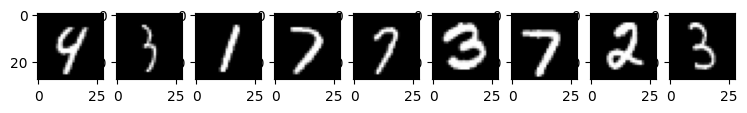

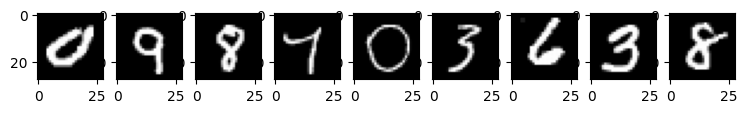

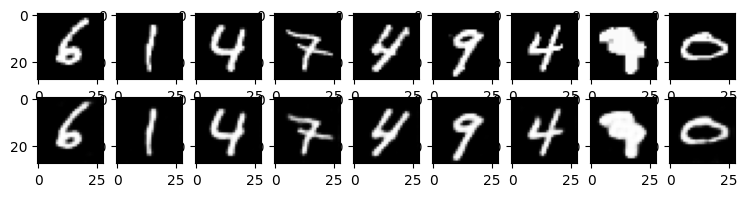

In [7]:
for k in range (0, num_epochs, 4) :
    plt.figure(figsize=(9,2))
    plt.gray()

    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()

    for i, item in enumerate(imgs):
        if i >= 9 : break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

for i, item in enumerate(recon):
    if i >= 9 : break
    plt.subplot(2, 9, 9 + i + 1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

In [8]:
encoded_data = []

for (img, _) in data_loader:
    #img = img.reshape(-1, 28 * 28)
    recon = model(img)
    encoded = model.encorder(img)
    encoded_data.append(encoded.detach().numpy())

In [9]:
with open('encoded_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(encoded_data)